# Fundamentals


- __Population__: Set of Objects, Indivisuals or events
    - All students in a university
    - Otcomes of an Experiment
    
- __Variable__: Characteristic of an individual object
    - Body length 
    - Gender
 
- __Sample__: Subset of objects of a population
    - Students taking a class
    - Respondents to a poll
    
    
- __Data__: Values of the variables of objects in a sample
    - Two type: __Qualitative and Quantitative__
       - _Quantitative data_: Numbers
            - Discrete (Integers e.g.)
            - Continuous (real numbers)
       - _Qualitative data_: Categories, classes
            - Gender, color, suceess/fail
            
            
Frequency in samples

- consider a sample with n observation of quantitative variable
- __Frequency__ of a value is Number of observation with that value
- __Relative__ frequency of a value: Frequency devided by number of observatinos (n)
- __Distribution__ of a sample values: All observed values and their relative frequency.

more general:
    
   - Qualitative data: count occurences of a class
        - Pie chart, bar graph, pareto diagram
   - Quantitative data: possible to group values in intervals
       - dot plot, steam-and-leaf display, histogram

## Measures for center
**Mean**: 

$$\bar{x}=\frac{1}{n}\sum_i^n x_{i}$$

**Median** :(Mean of) the middle number(s) when in ascending order. 

**Mode**: Most frequent measurment 

## Measuring variation:

**Range**:

$r $: Largest - Smallest value

**Variance**:

$$s^{2} = \frac{\sum_i^n(x_i-\overline{x})^2}{n-1}$$

**Standard deviation**:


$$s=\sqrt{s^2}$$


In [82]:
%matplotlib inline

import numpy as np
import scipy as sp
# from matplotlib import pyplot 
import matplotlib.pyplot as plt




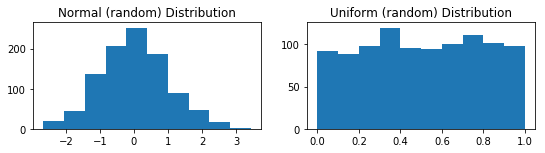

In [71]:
plt.figure(figsize=(9,9))

dataSet_218a = np.random.normal(size=1000)
plt.subplot(4, 2, 1)
plt.hist(dataSet_218a)
plt.title("Normal (random) Distribution")

plt.subplot(4, 2, 2)
dataSet_218b = np.random.uniform(size=1000)
plt.hist(dataSet_218b)
plt.title("Uniform (random) Distribution")

# rnd = np.random.choice(np.arange(1, 7), p=[0.2, 0.21, 0.18, 0.0, 0.21, 0.2])
# plt.hist(rnd)

# This is just all the values plotted, to illustarte the case, we need to plot
# the probability of the distribtuion (Relative Frequency of occuried values)


In [2]:
from scipy.interpolate import UnivariateSpline
N = 1000
n = N/10
s = np.random.normal(size=N)   # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N/10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.plot(x, f(x))
plt.show()

def my_dist(x):
    return np.exp(-x ** 2)

x = np.arange(-100, 100)
p = my_dist(x)
plt.plot(x, p)

plt.show()

NameError: name 'np' is not defined

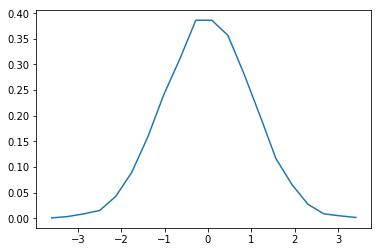

In [75]:
# Probability of Random distribution
x = np.random.randn(10000)

nbins = 20

n, bins = np.histogram(x, nbins, density=1)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

plt.plot(pdfx, pdfy)

In [81]:
m1 = [1,2,3,4,5]
m2 = [2,3,3,3,4]

np.mean(m1)
np.mean(m2)

3.0

## Percentiles and Quartiles

__p-th percentile:__ 
     
_The value for which at least p% of the observations are smaller than that value._

How to compute:

   -    $k = \frac{p}{100}n$
   -    $l = [k]$ (_ rounded up k to the nearest integer._ )

   -    $\begin{cases}x_{(l),} & if l\neq k,\\\frac{x_{k} + x_{k+1}}{2}, & if l = k\end{cases}$
   
   
** Lower and Upper Quartiles**:
    
   - $Q_L$: 25th percentile, $M$: 50th percentile, $Q_U$: 75th percentile

** Range**: Larget - Smallest value
** Interquartile Range (IRQ)**: $Q_U - Q_L$

## Percentiles and Quartiles

p-th percentile:

k = $ \frac{p}{100}n, l = [k] $  


$$p^{th} percentile = \begin{cases}x_{l}, & if \neq k\\\frac{x_k + x_{k+1}}{2} & if = k\end{cases}$$

### Chebyrshev's Rule

- In any sample we have **Chebyshev's rule**:

The interval $k - ks, x + ks)$ contains at least $(1 - \frac{1}{k^2} * 100 ) $% of the observations.

- If the histogarm of a sample is **mound shaped** we can apply the empirical rule:

| Interval | Empirical rule  | Chebyshev  |   
|----------|-----------------|-----------------|
| ( $\bar{x}-s$, $\bar{x}+s$) | 68%   | $\geq$  0%   |   
| ( $\bar{2x}-s$, $\bar{2x}+s$) | 95%   |  $\geq$ 75% |
| ( $\bar{3x}-s$, $\bar{3x}+s$) | 99.7% | $\geq$ 89%  |

## Number of measurements in a certain interval

Z-Score of an observation $x$ is 

$$ z = \frac{x-\overline{x}}{s} $$

_The number of standard deviations smaller or larger than the mean_.

outlier if ouside interval $( \overline{x}-3s, \overline{x} + 3s )$ interval or 
- Outside ($Q_L - 1.5 IQR, Q_U + 1.5 IQR$)

### Random Variables

In [3]:
from collections import defaultdict
dinv = defaultdict(list)

d = { (i, j) : i+j for i in range(1,7) for j in range(1,7)}

for i,j in d.iteritems():
    dinv[j].append(i)
    
dinv
    

defaultdict(list,
            {2: [(1, 1)],
             3: [(2, 1), (1, 2)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(4, 1), (3, 2), (1, 4), (2, 3)],
             6: [(5, 1), (3, 3), (1, 5), (4, 2), (2, 4)],
             7: [(1, 6), (2, 5), (5, 2), (6, 1), (4, 3), (3, 4)],
             8: [(6, 2), (4, 4), (5, 3), (2, 6), (3, 5)],
             9: [(5, 4), (6, 3), (3, 6), (4, 5)],
             10: [(6, 4), (5, 5), (4, 6)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

In [4]:
X={i:len(j)/36. for i,j in dinv.iteritems() }
X

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

In [3]:
#Data Sets
a = np.array([[1, 2], [3, 4], [5,6], [7,8], [9, 10]])

In [6]:
np.median(a)
# np.mod(a)
# np.mean(a, dtype=np.float64)

5.5

## np.std(a)

In [ ]:
def median(series):
    length = len(series)
    index = length // 2
    left, right = series[index - 1], series[index]
    if length % 1:
        return right
    else:
        return (right + left) / 2

In [19]:
a = np.zeros((2, 512*512), dtype=np.float32)
a[0, :] = 1.0
a[1, :] = 0.1
np.mean(a)

0.54999924

In [13]:
from fractions import Fraction

def P(event, space):
    ""
    return Fraction(len(event & space),
                   len(space))



In [14]:
Dice = {1,2,3,4,5,6}
even = {2,4,6}

# P(even,Dice)
# median(Dice
sp.mean(Dice)

TypeError: unsupported operand type(s) for /: 'set' and 'int'

In [5]:
# examples
st_salaries = { 15,21,22,22,24,24,26,27,29,35,37,78 }